In [3]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

#setting the random seed
np.random.seed(0)

In [6]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
### Converting the scikit-learn bunch dataset to Pandas DataFrame
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
#data['Target'] = pd.Series(data=iris.target, index=data.index)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
## Splitting the data into train set and test set
data['is_train'] = np.random.uniform(0,1,len(data)) <=0.75
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,False
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,False


In [23]:
# Creating dataframes with test rows and train rows
train, test = data[data['is_train']==True], data[data['is_train']==False]
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:', len(test))

Number of observations in the training data: 113
Number of observations in the test data: 37


In [25]:
# Create a list of the feature column's names
features = data.columns[:4]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [29]:
y = pd.factorize(train['species'])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2])

In [72]:
#Create a random forest classifier
clf = RandomForestClassifier(n_estimators=1000,n_jobs = 2, random_state=0)
# Training the classifier
clf.fit(train[features], y)

RandomForestClassifier(n_estimators=1000, n_jobs=2, random_state=0)

In [73]:
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2])

In [74]:
y_test = pd.factorize(test['species'])[0]
clf.score(test[features], y_test)

0.9459459459459459

In [75]:
clf.predict_proba(test[features])

array([[0.997, 0.003, 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.963, 0.037, 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.996, 0.004, 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.999, 0.001, 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.999, 0.001],
       [0.   , 0.966, 0.034],
       [0.   , 0.996, 0.004],
       [0.   , 0.044, 0.956],
       [0.   , 0.995, 0.005],
       [0.   , 0.999, 0.001],
       [0.   , 0.989, 0.011],
       [0.   , 0.002, 0.998],
       [0.002, 0.001, 0.997],
       [0.   , 0.004, 0.996],
       [0.   , 0.062, 0.938],
       [0.   , 0.006, 0.994],
       [0.002, 0.001, 0.997],
       [0.   , 0.003, 0.997],
       [0.   , 0.841, 0.159],
       [0.   , 0.008, 0.992],
       [0.   , 0.   , 1.   ],
       [0.   , 0.068, 0.932],
       [0.   , 0.371, 0.629],
       [0.

In [76]:
# mapping names for the plants for each predicted class
preds = iris.target_names[clf.predict(test[features])]
preds

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica'],
      dtype='<U10')

In [77]:
# Creating confusion matrix
pd.crosstab(test['species'], preds, rownames = ['Actual Species'], colnames = ['Predicted Species'] )

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,7,1
virginica,0,1,15


In [48]:
preds = iris.target_names[clf.predict( [[5.0,3.6,1.4,2.0],[5.0,3.6,1.4,2.0]] )]
preds

array(['setosa', 'setosa'], dtype='<U10')

Number of decision tree that were constructed: 100


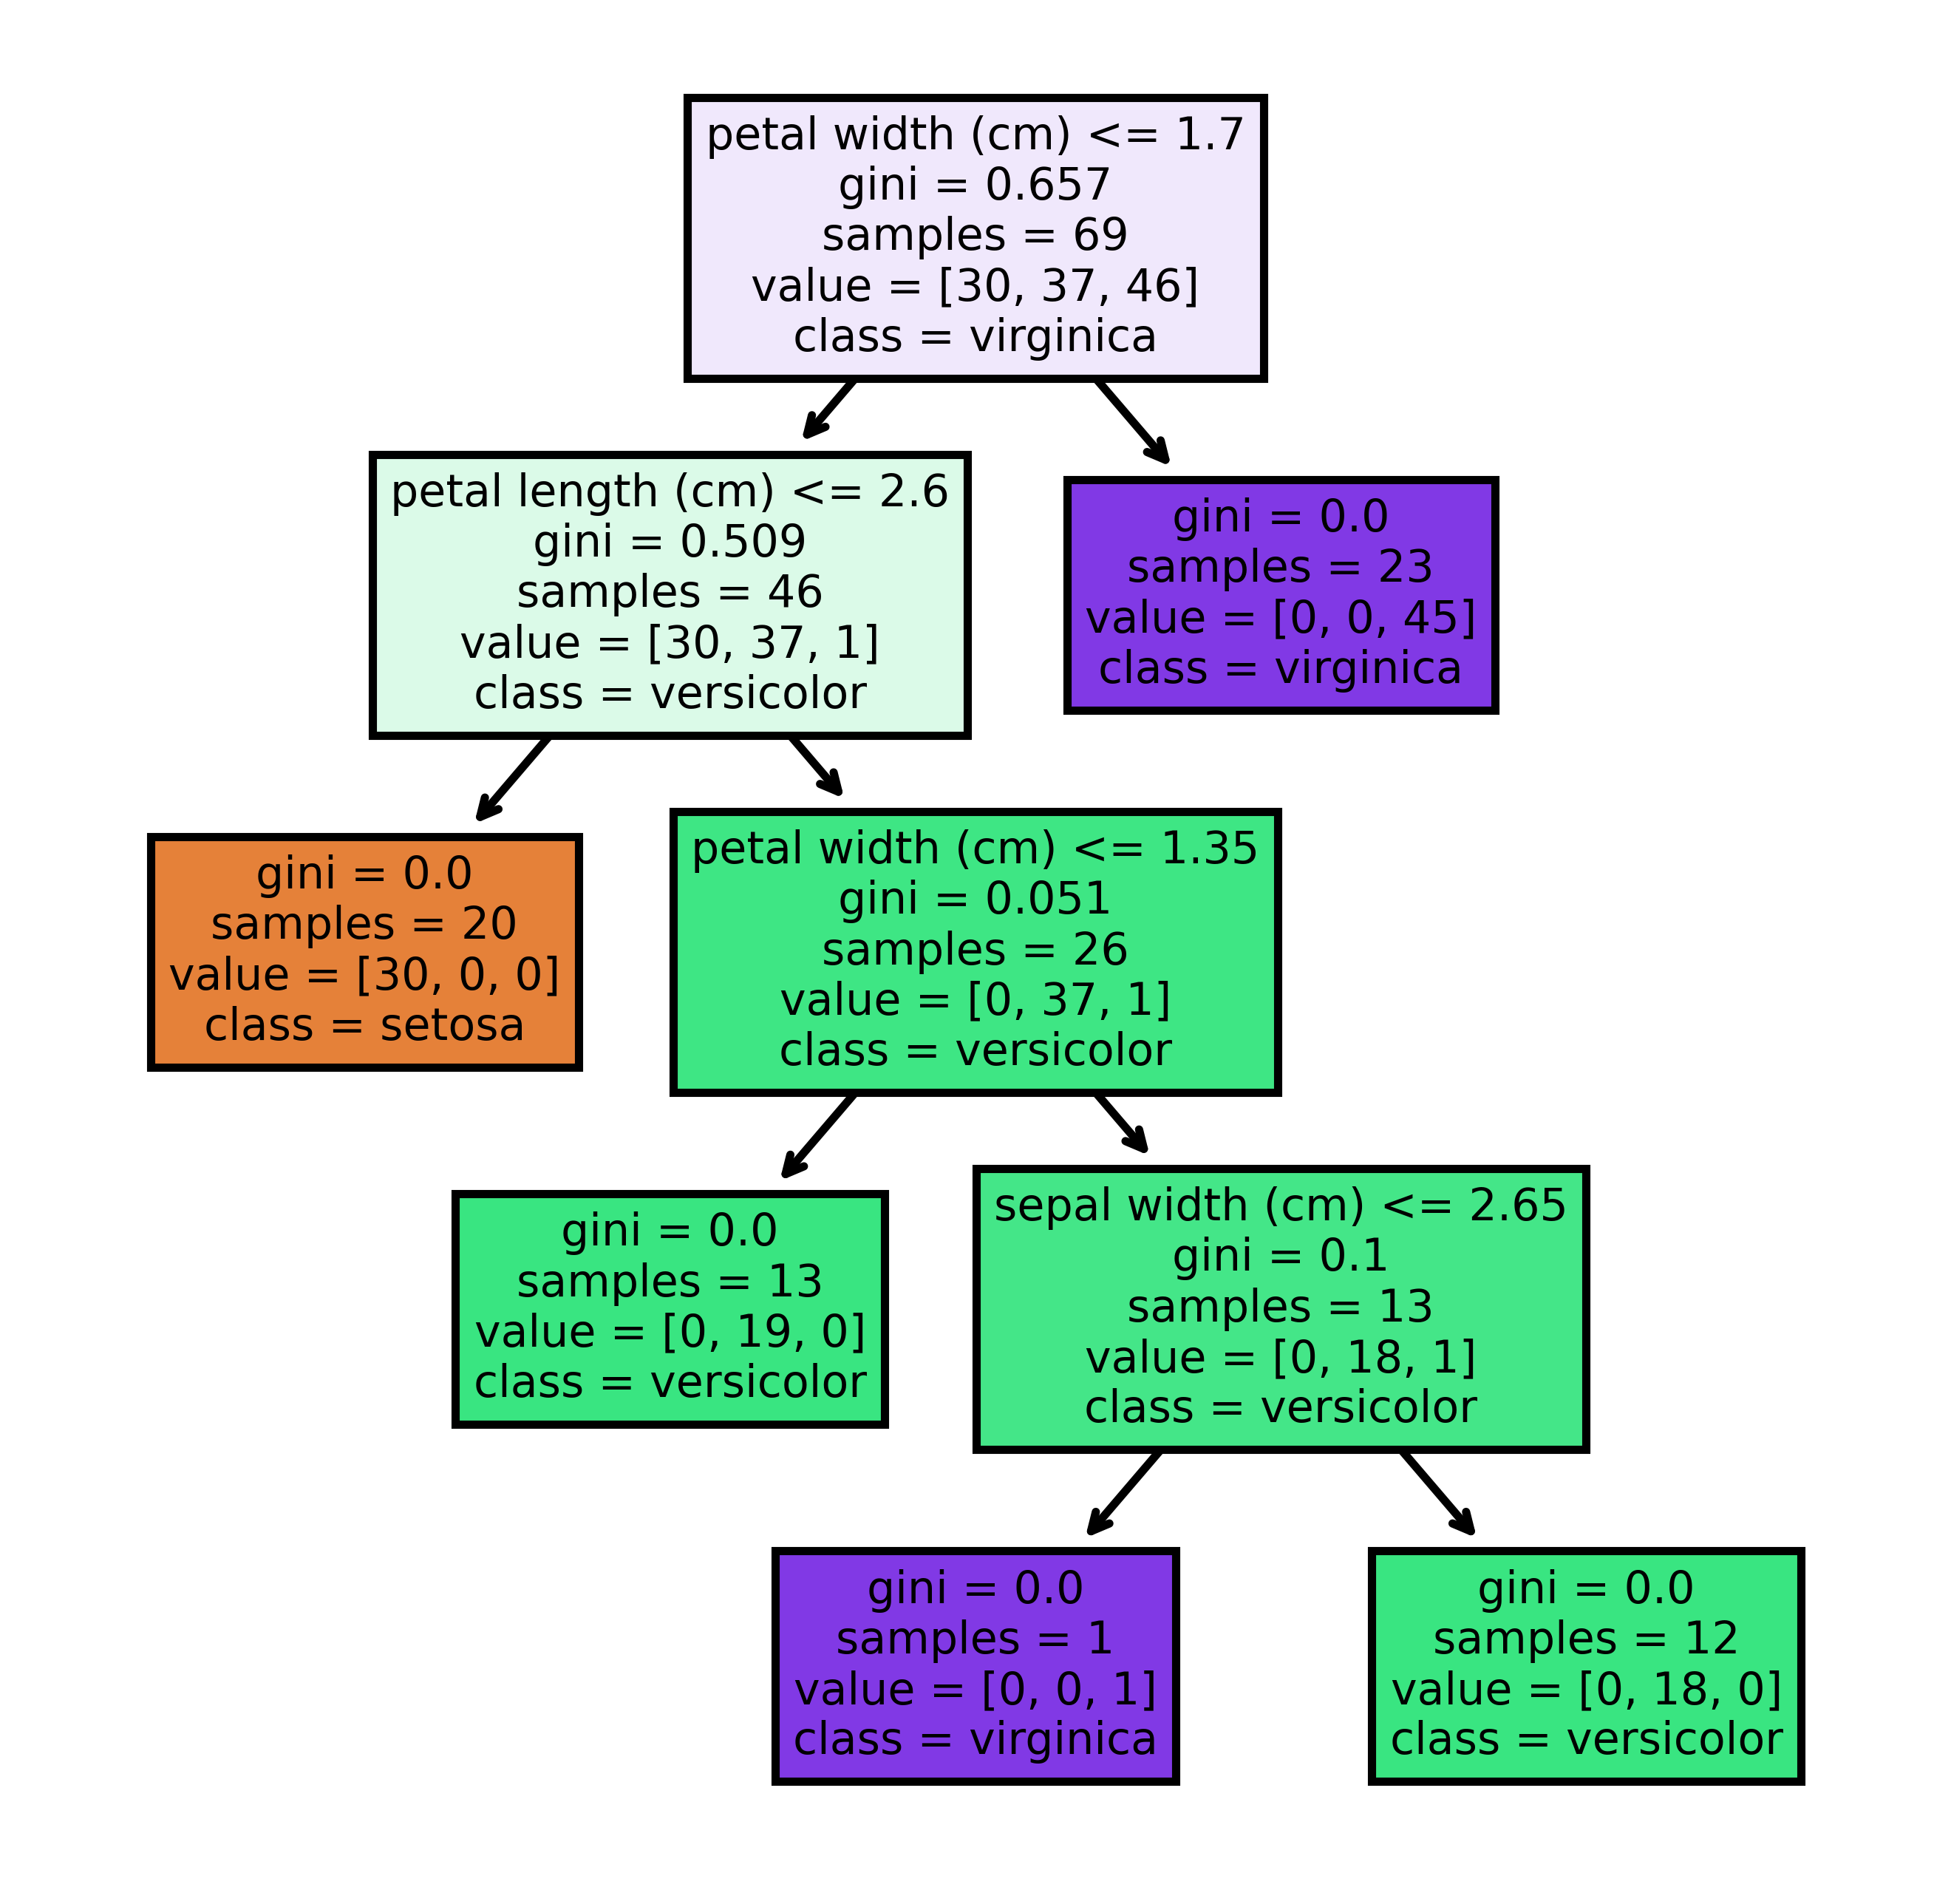

In [66]:
# Here we plot one decision tree as an example
import matplotlib.pyplot as plt
from sklearn import tree

fn= iris.feature_names
cn = iris.target_names
print('Number of decision tree that were constructed:',len(clf.estimators_))

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[0], feature_names = fn, 
               class_names=cn,
               filled = True);